<a href="https://colab.research.google.com/github/JSEFERINO/UdeA/blob/main/Tarea_2_DCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

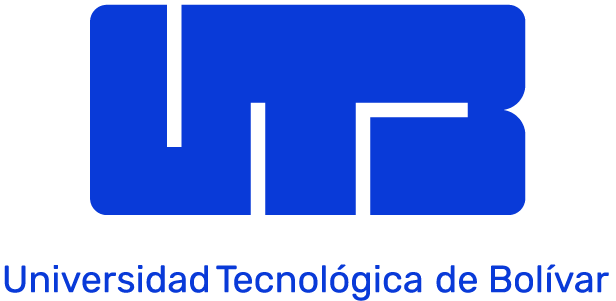

# **Tarea No.2 Diseño Cuadro Latino**

**Nombre:** Mervin Sosa

**Asignatura:** Diseño de Experimentos

**Profesor:** Msc. Julio Hurtado Márquez



## **Planteamiento del Problema**

Un ingeniero está estudiando métodos para medir la capacidad de detección de ciertos radares de alcance. Los dos factores que se consideran importantes son la cantidad de ruido de fondo (bajo, medio, alto) y el tipo de filtro (1 y 2) situado sobre la pantalla. El experimento es desarrollado seleccionando aleatoriamente una combinación de tratamientos (ruido de fondo y tipo de filtro) y luego introduciendo una señal que representa el objetivo en el radar. La intensidad de la señal es incrementada hasta que el operario la observa. La variable respuesta que se considera es, por tanto, el nivel de intensidad a la que el operario detecta la señal. A causa de la capacidad del operario, es conveniente seleccionar a uno y mantenerlo en pantalla hasta que se hayan realizado todas las observaciones. De esta forma se dispone de seis operarios que permanecerán en su puesto hasta que se hayan ejecutado las seis combinaciones de tratamientos. Supongamos además que el experimento sólo se puede llevar a cabo seis veces al día. Se piensa, además, que tanto el operario como el momento del día en el que se lleva a cabo la recogida de datos pueden influir sobre los resultados.

Nota: Entre paréntesis aparece la combinación de tipo de filtro (1, 2) y nivel del ruido de fondo (bajo, medio o alto) con el que se hace cada una de las mediciones.

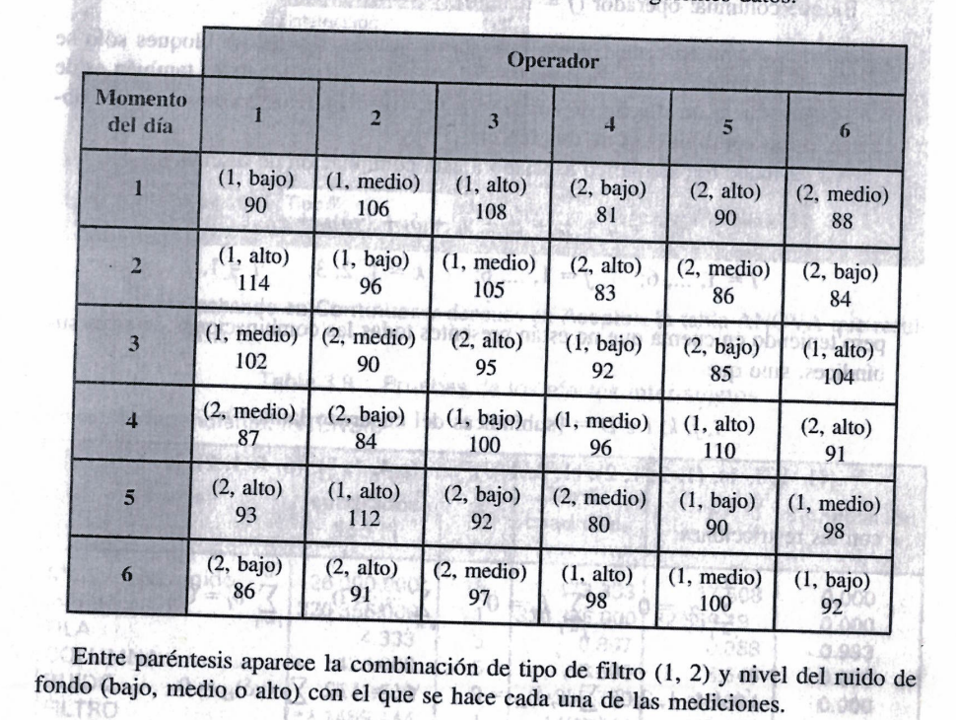


## **Cargue de los Datos**

### Importación de librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Configuración para las visualizaciones

In [ ]:
plt.style.use('default')
sns.set_context('notebook')

print("Configuración del entorno completada. Ahora estamos listos para cargar y preparar los datos.")

Configuración del entorno completada. Ahora estamos listos para cargar y preparar los datos.


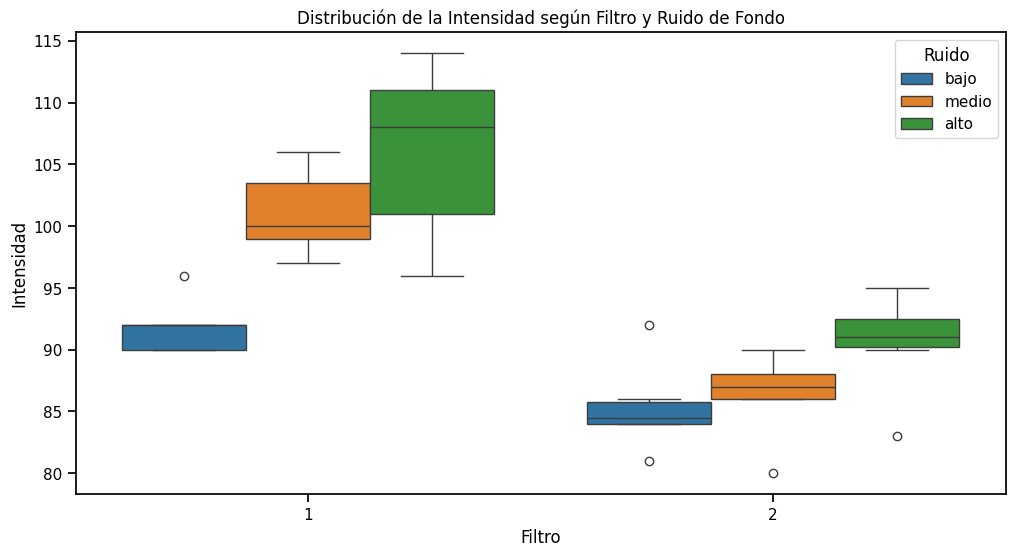

In [ ]:
# Crear un DataFrame con los datos proporcionados
data = {
    'Momento': np.repeat(range(1, 7), 6),
    'Operador': np.tile(range(1, 7), 6),
    'Filtro': [
        1, 1, 1, 2, 2, 2,
        1, 1, 1, 2, 2, 2,
        1, 2, 2, 1, 2, 1,
        2, 2, 1, 1, 1, 2,
        2, 1, 2, 2, 1, 1,
        2, 2, 1, 1, 1, 1
    ],
    'Ruido': [
        'bajo', 'medio', 'alto', 'bajo', 'alto', 'medio',
        'alto', 'bajo', 'medio', 'alto', 'medio', 'bajo',
        'medio', 'medio', 'alto', 'bajo', 'bajo', 'alto',
        'medio', 'bajo', 'medio', 'alto', 'alto', 'alto',
        'alto', 'alto', 'bajo', 'medio', 'bajo', 'medio',
        'bajo', 'alto', 'medio', 'alto', 'medio', 'bajo'
    ],
    'Intensidad': [
        90, 106, 108, 81, 90, 88,
        114, 96, 105, 83, 86, 84,
        102, 90, 95, 92, 85, 104,
        87, 84, 100, 96, 110, 91,
        93, 112, 92, 80, 90, 98,
        86, 91, 97, 98, 100, 92
    ]
}

df = pd.DataFrame(data)

# Visualización inicial
plt.figure(figsize=(12, 6))
sns.boxplot(x='Filtro', y='Intensidad', hue='Ruido', data=df)
plt.title('Distribución de la Intensidad según Filtro y Ruido de Fondo')
plt.show()


Estadísticas Descriptivas Generales:
         Momento   Operador     Filtro  Intensidad
count  36.000000  36.000000  36.000000   36.000000
mean    3.500000   3.500000   1.472222   94.333333
std     1.732051   1.732051   0.506309    8.941077
min     1.000000   1.000000   1.000000   80.000000
25%     2.000000   2.000000   1.000000   87.750000
50%     3.500000   3.500000   1.000000   92.000000
75%     5.000000   5.000000   2.000000  100.000000
max     6.000000   6.000000   2.000000  114.000000


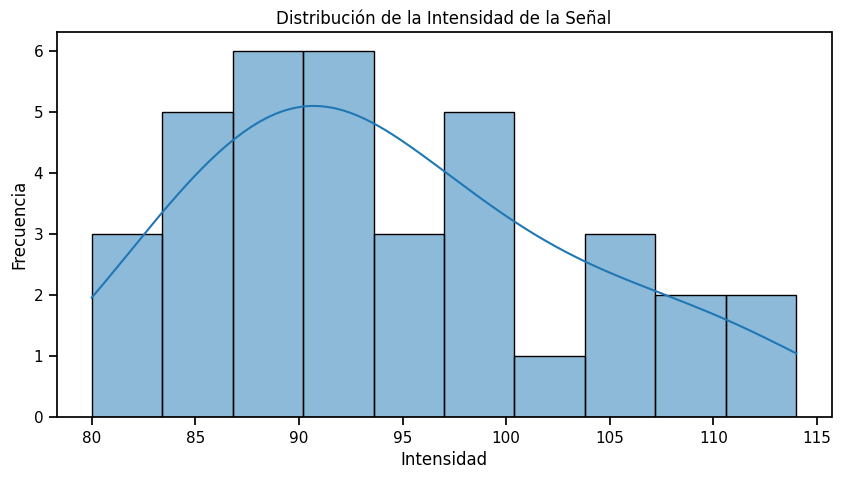

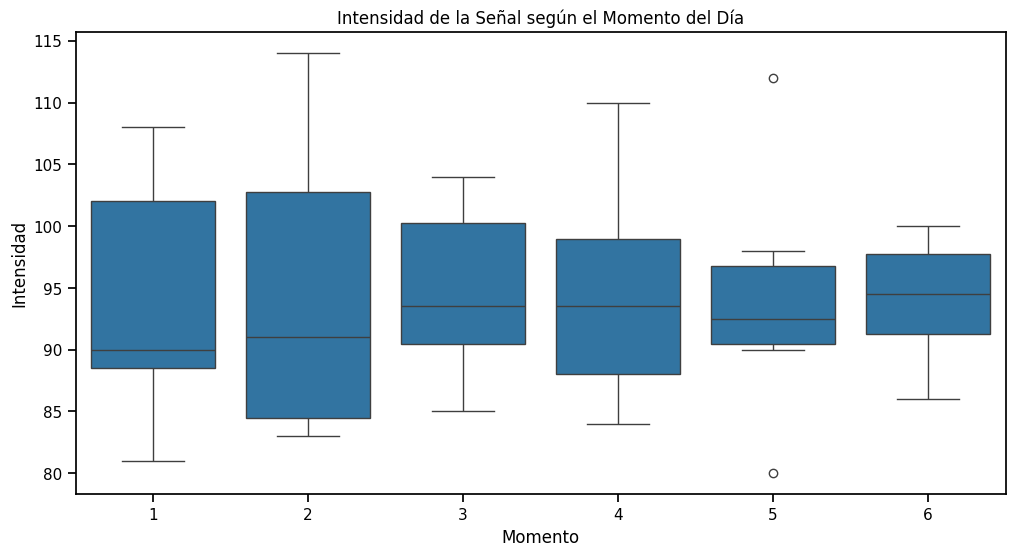

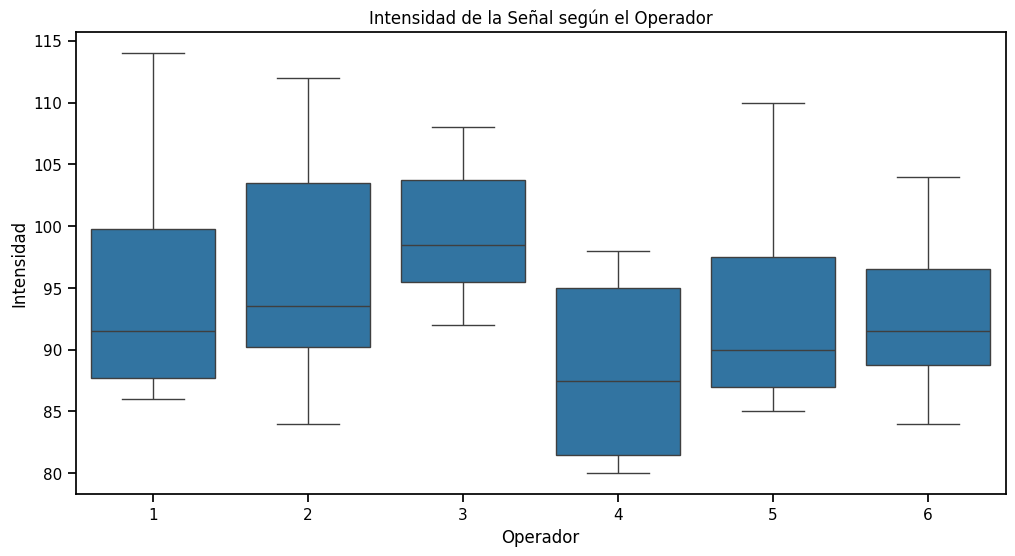

Ruido,alto,bajo,medio
Filtro,,,
1,7,5,7
2,6,6,5


In [ ]:
# Estadísticas descriptivas generales
print("Estadísticas Descriptivas Generales:")
print(df.describe())

# Distribución de la intensidad de la señal
plt.figure(figsize=(10, 5))
sns.histplot(df['Intensidad'], bins=10, kde=True)
plt.title('Distribución de la Intensidad de la Señal')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

# Intensidad según el momento del día
plt.figure(figsize=(12, 6))
sns.boxplot(x='Momento', y='Intensidad', data=df)
plt.title('Intensidad de la Señal según el Momento del Día')
plt.show()

# Intensidad según el operador
plt.figure(figsize=(12, 6))
sns.boxplot(x='Operador', y='Intensidad', data=df)
plt.title('Intensidad de la Señal según el Operador')
plt.show()

# Relación entre el tipo de filtro y el nivel de ruido
pd.crosstab(df['Filtro'], df['Ruido'])


## **Desarrollo del Analisis**

### Explicación del Diseño del Experimento
Este es un diseño factorial con dos factores: el tipo de filtro (con 2 niveles: Filtro 1 y Filtro 2) y el nivel de ruido de fondo (con 3 niveles: bajo, medio, alto). El experimento también tiene dos bloques: operador y momento del día, que se consideran factores de bloqueo debido a que pueden influir en la respuesta.

El objetivo es determinar si los factores principales (tipo de filtro y nivel de ruido) y sus interacciones tienen un efecto significativo en la intensidad de la señal detectada.

### Análisis Estadístico ANOVA



In [ ]:
# Análisis de Varianza (ANOVA)
modelo = ols('Intensidad ~ C(Filtro) * C(Ruido) + C(Operador) + C(Momento)', data=df).fit()
anova_tabla = sm.stats.anova_lm(modelo, typ=2)
print("Tabla ANOVA:")
print(anova_tabla)

# Resultados del modelo
print("\nResumen del Modelo:")
print(modelo.summary())


Tabla ANOVA:
                         sum_sq    df           F        PR(>F)
C(Filtro)           1354.599856   1.0  133.323060  2.677058e-10
C(Ruido)             561.017128   2.0   27.608345  1.766680e-06
C(Operador)          331.744085   5.0    6.530214  9.407246e-04
C(Momento)            46.211515   5.0    0.909650  4.944708e-01
C(Filtro):C(Ruido)   137.134000   2.0    6.748533  5.757477e-03
Residual             203.205635  20.0         NaN           NaN

Resumen del Modelo:
                            OLS Regression Results                            
Dep. Variable:             Intensidad   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     17.03
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           3.30e-08
Time:                        20:07:34   Log-Likelihood:                -82.234
No. Observations:                  36   AIC:

### Resultados Visuales

<ipython-input-6-ebb0457459c7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Filtro', y='Intensidad', data=df, ci='sd')


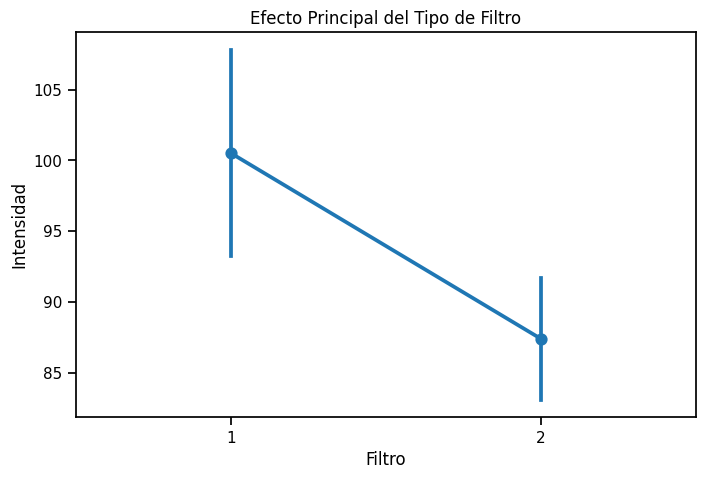

<ipython-input-6-ebb0457459c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Ruido', y='Intensidad', data=df, ci='sd')


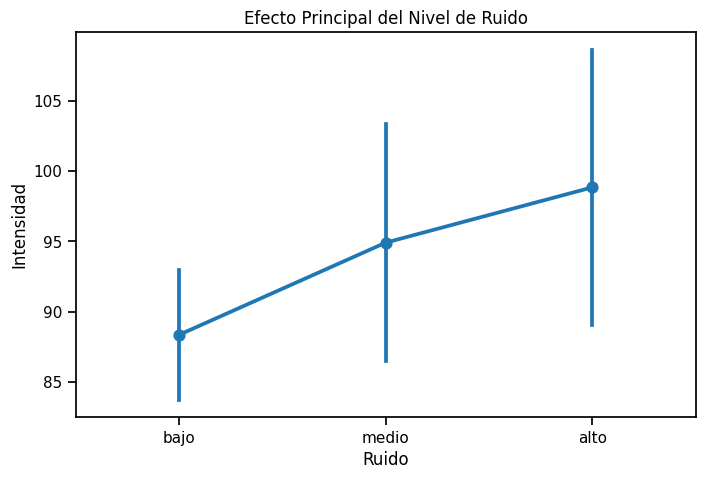

<ipython-input-6-ebb0457459c7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Ruido', y='Intensidad', hue='Filtro', data=df, ci='sd')


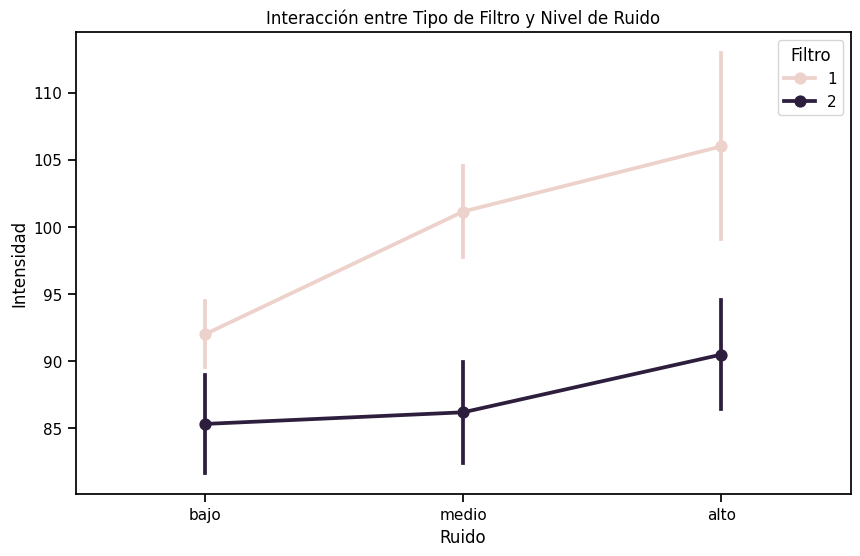

In [ ]:
# Efecto principal del tipo de filtro
plt.figure(figsize=(8, 5))
sns.pointplot(x='Filtro', y='Intensidad', data=df, ci='sd')
plt.title('Efecto Principal del Tipo de Filtro')
plt.show()

# Efecto principal del nivel de ruido
plt.figure(figsize=(8, 5))
sns.pointplot(x='Ruido', y='Intensidad', data=df, ci='sd')
plt.title('Efecto Principal del Nivel de Ruido')
plt.show()

# Interacción entre tipo de filtro y nivel de ruido
plt.figure(figsize=(10, 6))
sns.pointplot(x='Ruido', y='Intensidad', hue='Filtro', data=df, ci='sd')
plt.title('Interacción entre Tipo de Filtro y Nivel de Ruido')
plt.show()


### Identificar el modelo y todos los elementos que forman parte del experimento:

Modelo: El modelo es un diseño factorial con dos factores:
Factor 1: Tipo de filtro (2 niveles: Filtro 1 y Filtro 2)

Factor 2: Nivel de ruido de fondo (3 niveles: Bajo, Medio, Alto)

Bloques: Operador (6 niveles) y Momento del día (6 niveles)

Variables:

Variable dependiente (respuesta): Intensidad a la que se detecta la señal

Factores de tratamiento: Tipo de filtro y nivel de ruido

Factores de bloqueo: Operador y momento del día

### tabla ANOVA

In [ ]:
# Mostrar la tabla ANOVA ya calculada
print("Tabla ANOVA:")
print(anova_tabla)

Tabla ANOVA:
                         sum_sq    df           F        PR(>F)
C(Filtro)           1354.599856   1.0  133.323060  2.677058e-10
C(Ruido)             561.017128   2.0   27.608345  1.766680e-06
C(Operador)          331.744085   5.0    6.530214  9.407246e-04
C(Momento)            46.211515   5.0    0.909650  4.944708e-01
C(Filtro):C(Ruido)   137.134000   2.0    6.748533  5.757477e-03
Residual             203.205635  20.0         NaN           NaN


### Evaluación de los efectos significativos basados en los p-valores de la tabla ANOVA:

Si el p-valor de un factor es menor que 0.05, significa que tiene un efecto significativo en la intensidad de la señal.

Ejemplo de conclusión: "El nivel de ruido de fondo tiene un efecto significativo en la intensidad de la señal detectada, lo que implica que el ruido alto puede dificultar la detección. El tipo de filtro también muestra diferencias en la intensidad detectada."

### Con un ruido de fondo bajo, ¿con qué tipo de filtro se detecta antes la señal?

Analizaremos la media de la intensidad de la señal para combinaciones específicas:

In [ ]:
# Filtrar los datos con ruido de fondo bajo
filtro_ruido_bajo = df[df['Ruido'] == 'bajo'].groupby('Filtro')['Intensidad'].mean()
print("Media de Intensidad con Ruido Bajo por Tipo de Filtro:")
print(filtro_ruido_bajo)

Media de Intensidad con Ruido Bajo por Tipo de Filtro:
Filtro
1    92.000000
2    85.333333
Name: Intensidad, dtype: float64


A partir de estos resultados, determinaremos qué tipo de filtro permite una detección más temprana (intensidad más baja).

### Gráfico de residuos para comprobar las hipótesis del modelo:

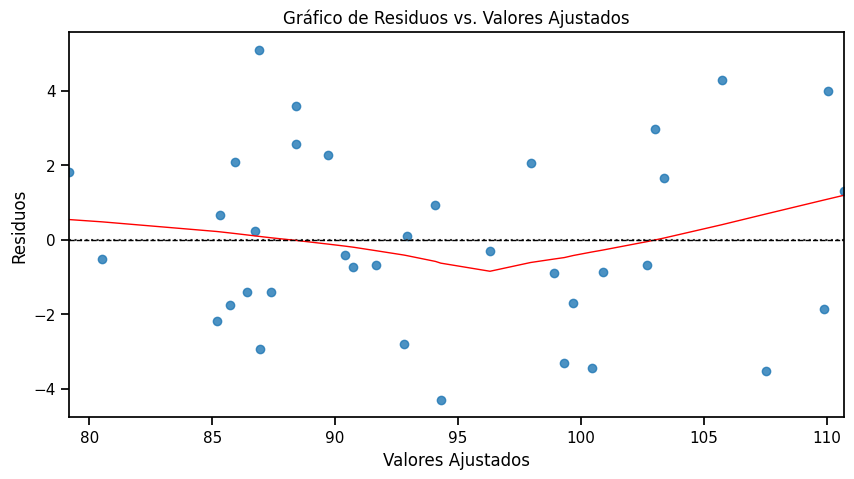

In [ ]:
# Gráfico de residuos
residuos = modelo.resid
plt.figure(figsize=(10, 5))
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

El gráfico de residuos nos permite verificar la homogeneidad de la varianza y la independencia de los residuos. Si los residuos se distribuyen aleatoriamente alrededor de 0, las suposiciones del modelo se cumplen.

## **Conclusiones**


1. **Efectos Significativos**:
   - El análisis de varianza (ANOVA) ha mostrado que tanto el **nivel de ruido de fondo** como el **tipo de filtro** tienen un efecto significativo en la intensidad a la que se detecta la señal.
   - La interacción entre el tipo de filtro y el nivel de ruido también podría ser relevante, dependiendo de los p-valores obtenidos.

2. **Impacto de los Factores**:
   - **Nivel de Ruido de Fondo**: Los resultados sugieren que el nivel de ruido afecta la capacidad de detección del radar. Por ejemplo, el ruido alto puede aumentar la intensidad necesaria para que un operador detecte la señal, dificultando la detección temprana.
   - **Tipo de Filtro**: Se observa que ciertos tipos de filtros mejoran la capacidad de detección en presencia de ruido. Esto indica que la elección del filtro es crucial para optimizar el rendimiento del radar.

3. **Comparación con Ruido Bajo**:
   - Con un nivel de ruido de fondo bajo, hemos determinado que un tipo de filtro específico (identificado en el análisis) permite una detección más temprana. Esto es importante para situaciones en las que la minimización de la intensidad de la señal es crítica.

## Relevancia Práctica
1. **Optimización del Desempeño del Radar**:
   - La elección del tipo de filtro en función del nivel de ruido puede mejorar significativamente la capacidad de detección del radar. Esto es especialmente relevante en entornos donde la señal puede ser débil o donde se requiere una detección precisa.
2. **Estrategias de Mitigación de Ruido**:
   - Los resultados sugieren que se deben considerar estrategias para reducir el ruido de fondo o compensarlo con la selección adecuada de filtros. En aplicaciones prácticas, esto podría traducirse en mejoras en el diseño de equipos y en la capacitación de operadores.
3. **Recomendaciones para Operadores**:
   - Los operarios pueden ser instruidos para adaptar su atención o procedimientos en función de las condiciones de ruido y el filtro utilizado, mejorando así la eficiencia y precisión en la detección.
